# 基于 sklearn 的机器学习快速上手
## 一、通用的机器学习过程
### 0 导入所需的模块

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import cross_val_score # 交叉验证
from sklearn.model_selection import GridSearchCV # 网格搜索

### 1 导入数据集

In [2]:
# iris = datasets.load_iris()
iris = datasets.load_wine()

### 2 数据理解和预处理

#### 观察数据质量

In [3]:
pd.concat([pd.DataFrame(iris.data), pd.DataFrame(iris.target)],axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### 3 指定预测目标

In [4]:
X = iris.data
y = iris.target

### 4 拆分训练集和测试集

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2)

### 5 训练数据集，生成模型

In [24]:
estimator = KNeighborsClassifier() #选择模型
model = estimator.fit(X_train, y_train)

### 6 预测

In [7]:
model.predict(X_test) # 预测数据

array([2, 2, 1, 2, 2, 2, 0, 0, 2, 1, 0, 1, 2, 0, 0, 2, 2, 0, 1, 0, 0, 2,
       2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2,
       0, 1, 2, 0, 2, 0, 2, 1, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 2, 1, 0, 2, 1, 2, 1, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 2, 0,
       2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 2, 0, 0,
       2, 0, 1, 0, 2, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1, 2, 0, 0, 2, 0, 2, 2,
       2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0])

In [8]:
y_test

array([1, 2, 1, 2, 2, 2, 0, 0, 1, 1, 2, 1, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0,
       1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 2, 0, 2, 2,
       0, 1, 1, 0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 2, 1, 0, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1, 0, 2, 2, 0,
       1, 0, 0, 1, 1, 2, 1, 2, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 0, 2, 2,
       1, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0])

In [9]:
score = model.score(X_test, y_test)
print('预测分数 %s'%score)

预测分数 0.6643356643356644


## 二、手动调整超参数

In [10]:
%%time

scores = []
for i in range(1, 30):
    _estimator = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(_estimator, X, y, cv=5).mean() # 5折交叉验证取最后平均值
    scores.append(score)

Wall time: 447 ms


In [11]:
max_socre = max(scores)
max_score_ne = scores.index(max_socre) + 1
print('最高得分： %.4f, 超参： %d' % (max_socre,max_score_ne))

最高得分： 0.7251, 超参： 1


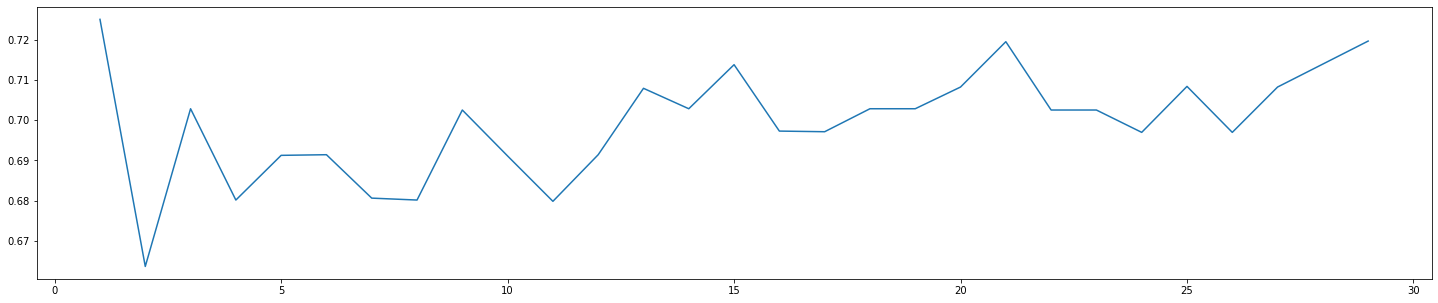

In [12]:
plt.figure(figsize=[25,5])
plt.plot(range(1, 30), scores)

## 三、网格搜索：自动调整超参数

In [13]:
estimator = KNeighborsClassifier()

In [19]:
params_grid = {
    'n_neighbors': np.arange(1,100),
    'p': [1,2,3,4] # p=1 曼哈顿距离,p=2 欧氏距离,p=3 切比雪夫距离, p=4 标准化欧氏距离
}

In [20]:
grid = GridSearchCV(estimator, params_grid, cv=5) # 重训练次数 20*4*5

In [21]:
%%time

grid.fit(X,y)

Wall time: 7.32 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'p': [1, 2, 3, 4]})

In [22]:
print('最佳参数', grid.best_params_)
print('最高评分', grid.best_score_)

最佳参数 {'n_neighbors': 1, 'p': 1}
最高评分 0.8093650793650793


## 红酒数据集尝试

In [35]:
wine = datasets.load_wine()
pd.concat([pd.DataFrame(iris.data), pd.DataFrame(iris.target)],axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [36]:
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3)

## 基础流程

In [41]:
estimator = KNeighborsClassifier() #选择模型
model = estimator.fit(X_train, y_train)

In [42]:
score = model.score(X_test, y_test)
print('预测分数 %s'%score)

预测分数 0.736


## 手动调整超参数

最高得分： 0.7254, 超参： 50
Wall time: 1.24 s


Text(0.5, 1.0, 'Lizhicheng')

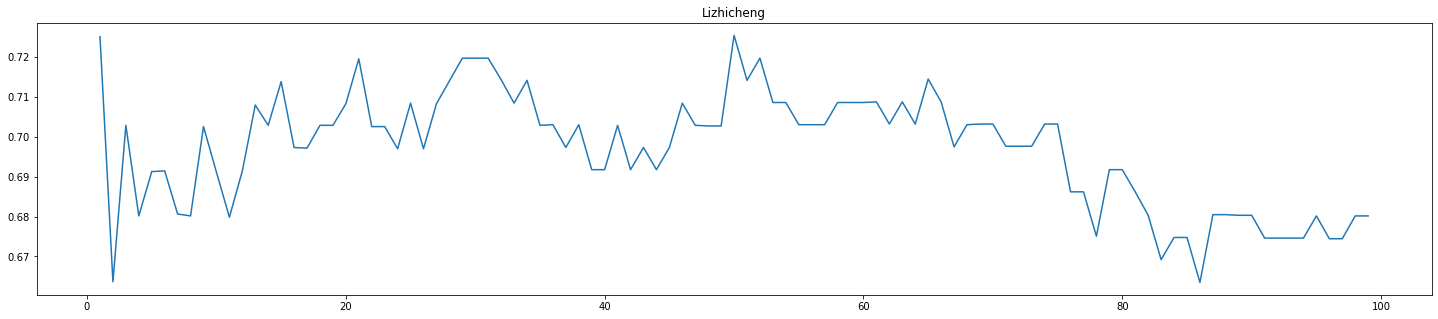

In [46]:
%%time

scores = []
for i in range(1, 100):
    _estimator = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(_estimator, X, y, cv=5).mean() # 5折交叉验证取最后平均值
    scores.append(score)
    
max_socre = max(scores)
max_score_ne = scores.index(max_socre) + 1
print('最高得分： %.4f, 超参： %d' % (max_socre,max_score_ne))

plt.figure(figsize=[25,5])
plt.plot(range(1, 100), scores)
plt.title('Lizhicheng')

## 自动调整超参数

In [47]:
%%time

estimator = KNeighborsClassifier()
params_grid = {
    'n_neighbors': np.arange(1,100),
    'p': [1,2,3,4]
}
grid = GridSearchCV(estimator, params_grid, cv=5) # 重训练次数 20*4*5


grid.fit(X,y)
print('最佳参数', grid.best_params_)
print('最高评分', grid.best_score_)

最佳参数 {'n_neighbors': 1, 'p': 1}
最高评分 0.8093650793650793
Wall time: 6.31 s
